In [43]:
import pandas as pd
ppl=pd.read_csv('Bank.csv')

In [44]:
ppl.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [45]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [46]:
ppl.shape


(45211, 17)

In [47]:
ppl.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<Axes: ylabel='age'>

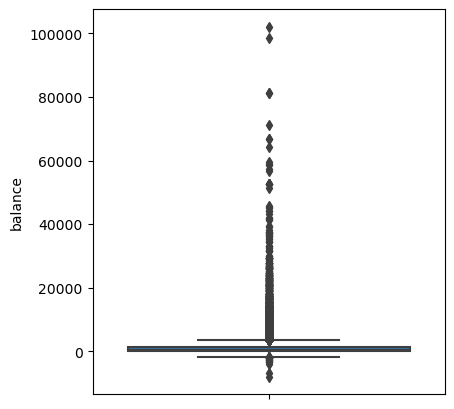

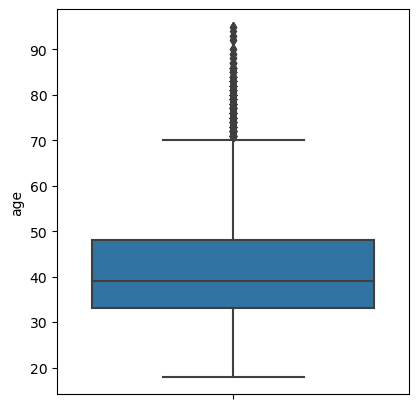

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=ppl['balance'])

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.boxplot(y=ppl['age'])

AttributeError: module 'matplotlib.pyplot' has no attribute 'countplot'

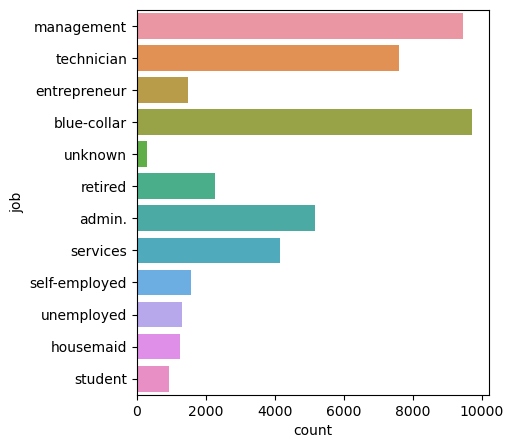

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(y=ppl['job'])

plt.countplot(1,2,2)
sns.countplot(y=ppl['default'])

In [ ]:
#to check how many null values
ppl.isnull().sum()

In [50]:
q1,q3=ppl['balance'].quantile([.25,.75])
IQR=q3-q1
ll=q1-1.5*IQR
ul=q3+1.5*IQR

In [51]:
ul

3462.0

In [52]:
pp=ppl[ppl['balance']>ul]

In [53]:
pp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
34,51,management,married,tertiary,no,10635,yes,no,unknown,5,may,336,1,-1,0,unknown,no
65,51,management,married,tertiary,no,6530,yes,no,unknown,5,may,91,1,-1,0,unknown,no
69,35,blue-collar,single,secondary,no,12223,yes,yes,unknown,5,may,177,1,-1,0,unknown,no
70,57,blue-collar,married,secondary,no,5935,yes,yes,unknown,5,may,258,1,-1,0,unknown,no
186,40,services,divorced,unknown,no,4384,yes,no,unknown,5,may,315,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45164,35,services,married,tertiary,no,4655,no,no,cellular,9,nov,111,2,-1,0,unknown,no
45181,46,blue-collar,married,secondary,no,6879,no,no,cellular,15,nov,74,2,118,3,failure,no
45185,60,services,married,tertiary,no,4256,yes,no,cellular,16,nov,200,1,92,4,success,yes
45191,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes


In [54]:
ppl['default'].count()

45211

In [55]:
ppl['default'].value_counts(normalize=True)

default
no     0.981973
yes    0.018027
Name: proportion, dtype: float64

In [56]:
ppl['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [57]:
#setting outliers value to upper limit
ppl['default']=np.where(ppl['balance']>ul,ul,ppl['balance'])

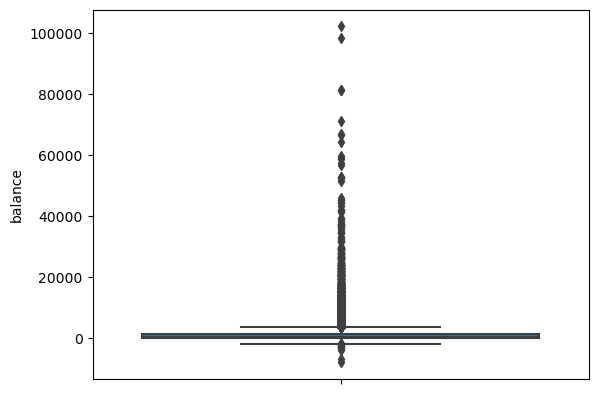

In [58]:
sns.boxplot(y=ppl['balance'])
plt.show()

In [59]:
ppl=pd.get_dummies(ppl,drop_first=True)

In [60]:
ppl.head()

,age,default,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,Target_yes
0,58,2143.0,2143,5,261,1,-1,0,False,False,...,False,False,True,False,False,False,False,False,True,False
1,44,29.0,29,5,151,1,-1,0,False,False,...,False,False,True,False,False,False,False,False,True,False
2,33,2.0,2,5,76,1,-1,0,False,True,...,False,False,True,False,False,False,False,False,True,False
3,47,1506.0,1506,5,92,1,-1,0,True,False,...,False,False,True,False,False,False,False,False,True,False
4,33,1.0,1,5,198,1,-1,0,False,False,...,False,False,True,False,False,False,False,False,True,False


### Logistic regression-

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x=ppl.drop('default',axis=1)
y=ppl['default']

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=21)
#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=21,stratify=y)
#startify is used to remove data imbalance as the given data set have low defaulters hence, it shouldn't be like training dataset have more defaulter dataset in comparison to teting dataset

In [78]:
#TOO ADD DUMMY VALUES-

#from imblearn.over_sampling import SMOTE
#sm=SMOTE(random_state=33,sampling_startegy=0.75)
#x_res,y_res=sm.fit_sample(x_train,y_train)

In [79]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

In [ ]:
y_pred=lr.predict(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)